In [1]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import csv
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
filename='nile_red_1508.csv' #fluorescence
filename1='od_nile_red_1508.csv' #od

nile_red=pd.read_csv(filename, skiprows=13,usecols=range(1,13)) #read file1
nile_red=np.array(nile_red) #to array

od750=pd.read_csv(filename1,delimiter='\t' ,skiprows=13,usecols=range(1,13)) #read file2
od750=od750.fillna(value=dict(zip(['7','8','9','10','11','12'],od750.iloc[-1,:6]))) #fill na values
od750=np.array(od750) #to array


In [3]:
blank=od750[-1].mean() #mean bg11

In [4]:
od750=od750-blank #blank ods
od750[-1]=1

In [5]:
norm=nile_red/od750 #normalize fluorescence to OD750

In [6]:
mean=[]
err=[]
#mean and std of technical replicates
for x in range(len(norm)):
    i=0
    while i< len(norm[0]):
        mean.append(norm[x,i:i+4].sum()/len(norm[x,i:i+4]))
        err.append(norm[x,i:i+4].std())
        i+=4

In [7]:
new_norm=np.copy(norm) #copy array

new_norm[-1]=new_norm[-1][:8].mean() 

x_value=[]
means=[]

#mean of biological replicates
for x in range(len(new_norm)):
    x_value.append([x+1]*len(new_norm[x]))
    means.append(new_norm[x].sum()/len(new_norm[x]))
    


In [8]:
#labels
labeli=['$\Delta shc$_EVC',
 '$\Delta shc$_SQS1',
 'GT-V_EVC',
 'GT-V_SQS',
 'GT-U_EVC',
 'GT-U_SQS',
 '     BG11']

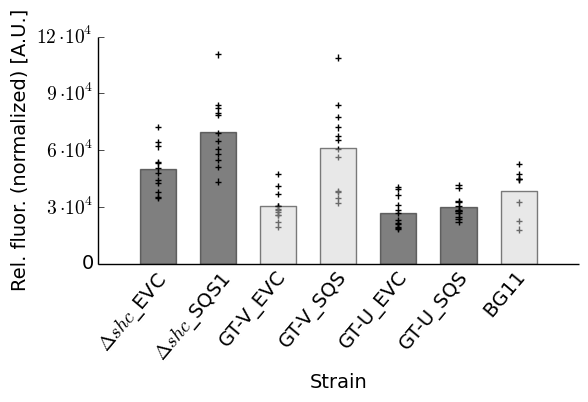

In [9]:
from matplotlib.ticker import MaxNLocator

ax= plt.subplot(111)

#plot data points
ax.scatter(x_value[:-2],norm[:-2],marker='+',c='k')
#barplot means
ax.bar(np.array(range(1,len(means[:-2])+1))-0.3,means[:-2],color=['k','k','lightgray','lightgray','k','k'],width=0.6, alpha=0.5)
#plot data points bg11
ax.scatter(x_value[-2],norm[-1],marker='+',c='k')
#pbarplot means bg11
ax.bar(len(means)-1-0.3,means[-1],color='lightgray',width=0.6, alpha=0.5)

#format plot
plt.xticks(np.array(range(1,len(means)+1))-0.4, labeli,rotation=50,fontsize=14) #xticks
plt.yticks([0,3*10**4,6*10**4,9*10**4,12*10**4],[0, '$3 \cdot 10^{4}$' ,'$6 \cdot 10^{4}$','$9 \cdot 10^{4}$' 
                                                 ,'$12 \cdot 10^{4}$'],fontsize=14)
plt.xlabel('Strain',fontsize=14)
plt.ylabel('Rel. fluor. (normalized) [A.U.]',fontsize=14)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('none')

ax.yaxis.set_major_locator(MaxNLocator(4))

plt.ylim(0)

plt.tight_layout()

#save plot
#plt.savefig('Nile_red_1508_bg11.png',bbox_inches='tight',dpi=1000)


# Statistics

In [10]:
for x in range(len(norm)):
    print stats.normaltest(norm[x])
    
#Normality Test

NormaltestResult(statistic=0.70619154239700466, pvalue=0.70250990993935047)
NormaltestResult(statistic=2.3230707529373693, pvalue=0.31300523089135174)
NormaltestResult(statistic=3.0441549401264769, pvalue=0.21825799119526729)
NormaltestResult(statistic=0.72995517450916192, pvalue=0.69421220990514521)
NormaltestResult(statistic=2.050283458181962, pvalue=0.35874561711248865)
NormaltestResult(statistic=2.0364190475396455, pvalue=0.36124115518585354)
NormaltestResult(statistic=2.1687934138340026, pvalue=0.33810570120904099)
NormaltestResult(statistic=nan, pvalue=nan)


/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [11]:
x=0

while x < len(norm)-2:
    print x,x+1
    print stats.bartlett(norm[x],norm[x+1])
    x+=2
    
#Bartlett's test on equal variances (no equal var = Welch's test)

0 1
BartlettResult(statistic=1.9521280276187554, pvalue=0.16235771993409032)
2 3
BartlettResult(statistic=10.199445331823856, pvalue=0.0014048290188396673)
4 5
BartlettResult(statistic=0.88402854475999038, pvalue=0.34710066245008797)


In [12]:
x=0

while x < len(norm)-2:
    print x,x+1
    print stats.ttest_rel(norm[x],norm[x+1])
    x+=2
    
#Paired sample t-test 

0 1
Ttest_relResult(statistic=array(-3.580907936666899), pvalue=0.0043117906888698182)
2 3
Ttest_relResult(statistic=array(-4.441007208527634), pvalue=0.00099335813819396968)
4 5
Ttest_relResult(statistic=array(-0.9681109821864933), pvalue=0.35379319077608717)


In [13]:
x=0

while x < len(norm)-2:
    print x,x+1
    print stats.wilcoxon(norm[x],norm[x+1])
    x+=2
    
#Wilcoxon signed-rank test

0 1
WilcoxonResult(statistic=5.0, pvalue=0.0076490820552939202)
2 3
WilcoxonResult(statistic=1.0, pvalue=0.0028734139278525227)
4 5
WilcoxonResult(statistic=27.0, pvalue=0.34652171170610724)


In [14]:
x=0

while x < 2:
    print x,x+2,x+4
    print stats.bartlett(norm[x],norm[x+2],norm[x+4])
    x+=1
    
#Bartlett's test on equal variances (no equal var = Welch's test)

0 2 4
BartlettResult(statistic=2.2940691666830393, pvalue=0.31757712291057244)
1 3 5
BartlettResult(statistic=15.174693845925251, pvalue=0.00050682391471012578)


In [15]:
x=0

while x < 2:
    print x,x+2,x+4
    print stats.f_oneway(norm[x],norm[x+2],norm[x+4])
    x+=1

#One way ANOVA

0 2 4
F_onewayResult(statistic=20.383878885616582, pvalue=1.720605827627216e-06)
1 3 5
F_onewayResult(statistic=17.424948566385545, pvalue=6.8378302346752413e-06)


In [16]:
x=0

while x < 2:
    print x,x+2,x+4
    print stats.kruskal(norm[x],norm[x+2],norm[x+4])
    x+=1
    
#Kruskal Wallis test

0 2 4
KruskalResult(statistic=18.60510510510511, pvalue=9.1191163907905479e-05)
1 3 5
KruskalResult(statistic=20.882882882882882, pvalue=2.9197092036467489e-05)


In [17]:
#Tukey's HSD

all = list(norm[0]) + list(norm[2]) + list(norm[4])

shc = ['shc']*len(norm[0])
v = ['v']*len(norm[2])
u = ['u']*len(norm[4])

treatments = shc + v + u

data = {'Data': all,
        'Group': treatments}
data = pd.DataFrame(data, columns=['Data', 'Group'])

data.head()

from statsmodels.stats.multicomp import pairwise_tukeyhsd

res2 = pairwise_tukeyhsd(data['Data'],data['Group'])
print(res2)

   Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower       upper    reject
--------------------------------------------------------
  0      1    -22860.8626 -32353.3727 -13368.3524  True 
  0      2    -19540.6394 -29033.1496 -10048.1292  True 
  1      2     3320.2232   -6172.287   12812.7334 False 
--------------------------------------------------------


In [18]:
print stats.ttest_ind(norm[1],norm[3],equal_var=False) 
print stats.ttest_ind(norm[1],norm[5],equal_var=False)
print stats.ttest_ind(norm[3],norm[5],equal_var=False)

#Welch's test

Ttest_indResult(statistic=array(0.9874618035011967), pvalue=0.33468891581303861)
Ttest_indResult(statistic=array(7.122025039254209), pvalue=6.7024741215168318e-06)
Ttest_indResult(statistic=array(4.549872637561864), pvalue=0.00060107589047079006)


In [19]:
#write results to csv
with open('nile_red.csv','wb') as f:
    wr = csv.writer(f)
    i=0
    for x in norm[:-2]:
        wr.writerow(x[i:i+4])
        wr.writerow(x[i+4:i+8])
        wr.writerow(x[i+8:i+12])